In [1]:
import pandas as pd
import numpy as np
import os, sys
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./dataset/df_noOutliner_ana.csv",encoding='utf_8_sig',index_col='UUID')

In [3]:
df.shape

(4778, 73)

In [4]:
# Rearrange the dataset
## numerical (17)
num=df[['BT_NM', 'HR_NM', 'RR_NM', 'HB_NM', 'HCT_NM', 'PLATELET_NM', 'WBC_NM', 'PTT1_NM',
    'PTT2_NM', 'PTINR_NM', 'ER_NM', 'BUN_NM', 'CRE_NM', 'BMI', 'age', 'NIHTotal',
    'PPD',]]
## category (55)
cat=df[['THD_ID', 'THDA_FL', 'THDH_FL', 'THDI_FL',
       'THDAM_FL', 'THDV_FL', 'THDE_FL', 'THDM_FL', 'THDR_FL', 'THDP_FL',
       'THDOO_FL','Gender','cortical_ACA_ctr', 'cortical_MCA_ctr', 'subcortical_ACA_ctr',
       'subcortical_MCA_ctr', 'PCA_cortex_ctr', 'thalamus_ctr',
       'brainstem_ctr', 'cerebellum_ctr', 'Watershed_ctr',
       'Hemorrhagic_infarct_ctr', 'cortical_ACA_ctl', 'cortical_MCA_ctl',
       'subcortical_ACA_ctl', 'subcortical_MCA_ctl', 'PCA_cortex_ctl',
       'thalamus_ctl', 'brainstem_ctl', 'cerebellum_ctl', 'Watershed_ctl',
       'Hemorrhagic_infarct_ctl', 'cortical_CT', 'subcortical_CT',
       'circulation_CT', 'CT_find', 'watershed_CT', 'Hemorrhagic_infarct_CT',
       'CT_left', 'CT_right', 'NIHS_1a_in', 'NIHS_1b_in', 'NIHS_1c_in',
       'NIHS_2_in', 'NIHS_3_in', 'NIHS_4_in', 'NIHS_5aL_in', 'NIHS_5bR_in',
       'NIHS_6aL_in', 'NIHS_6bR_in', 'NIHS_7_in', 'NIHS_8_in', 'NIHS_9_in',
       'NIHS_10_in', 'NIHS_11_in', ]]
## Label (1)
label=df[['elapsed_class']]
df=pd.concat([num,cat,label],axis=1).to_numpy()
df.shape

(4778, 73)

In [5]:
sc = MinMaxScaler()
sc.fit(df)
df=sc.transform(df)

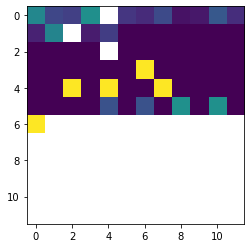

In [6]:
## transform to 12*12 matrix (fill with NaN)
df_img=[]
for i in range(len(df)):
    df_img.append(np.pad(df[i],(0,71),constant_values=np.nan).reshape(12,12))
df_img=np.array(df_img)

## Test image
plt.imshow(df_img[0]) 